\**Breast Cancer Classification with a simple Neural Network (NN)**

**Importing the Dependencies**

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras

In [481]:
# loading the data from sklearn
df = sklearn.datasets.load_breast_cancer()

In [482]:
print(df)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [483]:
# loading the data to a data frame
df1 = pd.DataFrame(df.data, columns = df.feature_names)

In [484]:
# print the first 5 rows of the dataframe
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [485]:
# adding the 'Label' column to the data frame
df1['label'] = df.target

In [486]:
#Checking for Null values
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [487]:
# number of rows and columns in the dataset
df1.shape

(569, 31)

In [488]:
# statistical measures about the data
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [489]:
# checking the distribution of Label Variable
df1['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

Separating the features and target

In [490]:
X = df1.drop(columns='label', axis=1)
Y = df1['label']

In [491]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [492]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [493]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.2, random_state=60)

In [494]:
print(X.shape, xtrain.shape, xtest.shape)

(569, 30) (455, 30) (114, 30)


**Standardize** the data

In [495]:
from sklearn.preprocessing import StandardScaler

In [496]:
scaler = StandardScaler()

xtrain_std = scaler.fit_transform(xtrain)

xtest_std = scaler.transform(xtest)

In [513]:
import pickle
with open('scaler.pkl','wb') as file1:  # wb is for write binary
    pickle.dump(scaler,file1)

**Building the Neural Network**

In [497]:
tf.random.set_seed(3)

In [498]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [499]:
# setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [500]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [501]:
# training the Meural Network
history = model.fit(xtrain_std, ytrain, validation_split=0.1, epochs=45,)

Epoch 1/45
 1/13 ━━━━━━━━━━━━━━━━━━━━ 9s 809ms/step - accuracy: 0.7188 - loss: 0.6392

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6985 - loss: 0.5838 - val_accuracy: 0.8913 - val_loss: 0.3691
Epoch 2/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 0.3495 - val_accuracy: 0.9130 - val_loss: 0.2467
Epoch 3/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2469 - val_accuracy: 0.9565 - val_loss: 0.1998
Epoch 4/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.1955 - val_accuracy: 0.9565 - val_loss: 0.1776
Epoch 5/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1652 - val_accuracy: 0.9565 - val_loss: 0.1659
Epoch 6/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.1454 - val_accuracy: 0.9565 - val_loss: 0.1584
Epoch 7/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9742 - loss: 0.1316 - val_accuracy: 0.9565 - val_loss: 0.1534
Epoch 8/45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.1210 - val_accuracy: 0.9565 - val_loss: 0.1497
Ep

Visualizing accuracy and loss

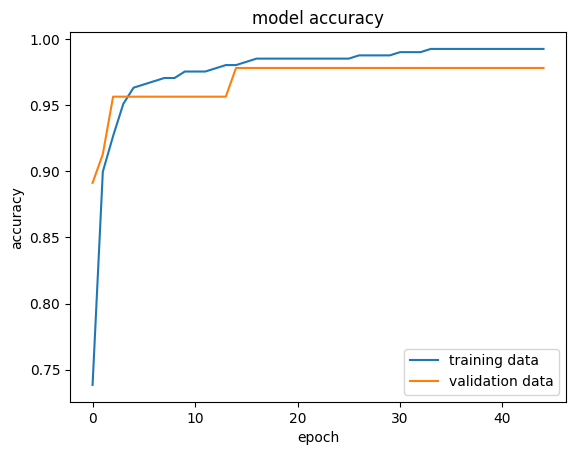

In [502]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

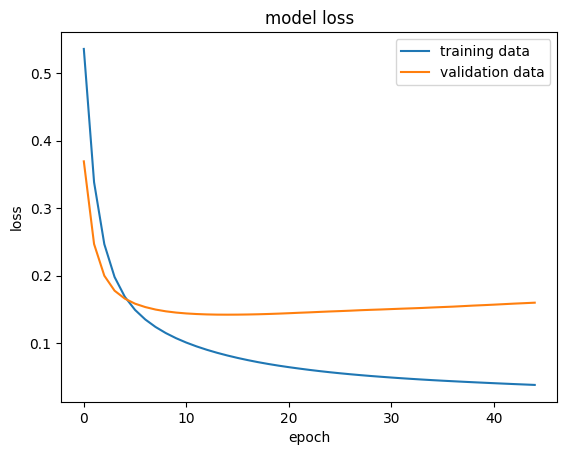

In [503]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'testing data'], loc = 'upper right')

Accuracy of the model on test data

In [504]:
loss, accuracy = model.evaluate(xtest_std, ytest)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.0569 
0.9736841917037964


In [505]:
print(xtest_std.shape)
print(xtest_std[0])

(114, 30)
[ 0.56369559  0.93521591  0.46443244  0.44074248 -1.0515149  -0.73851859
 -0.72850744 -0.42236147 -1.05442851 -0.86002199 -0.08381917 -0.06166428
 -0.19596816  0.029366   -1.01651462 -0.92356368 -0.73284111 -0.71727434
 -0.7077772  -0.29639912  0.64401403  1.34517617  0.52951908  0.52962096
 -0.64825819 -0.64016304 -0.62599108 -0.24453079  0.07033063  0.01210071]


In [506]:
Y_pred = model.predict(xtest_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [507]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.7438127 0.5410593]


In [508]:
print(xtest_std)

[[ 0.56369559  0.93521591  0.46443244 ... -0.24453079  0.07033063
   0.01210071]
 [-0.21283795 -0.80859622 -0.21710433 ...  0.85539269  0.99263895
   0.94097734]
 [-0.12011752 -0.97636134 -0.14226562 ... -0.15706327  0.7696283
   0.6570935 ]
 ...
 [ 1.37210177  0.16491408  1.22963721 ...  0.21448021 -0.53657692
  -1.46442156]
 [ 2.73393298  1.17859349  2.66754945 ...  1.44521795 -0.49516066
  -0.37620017]
 [-0.94301127  1.16441615 -0.95708256 ... -1.28345922  0.24714621
  -0.43711011]]


In [509]:
print(Y_pred)

[[7.43812680e-01 5.41059315e-01]
 [7.34135807e-01 6.38377488e-01]
 [6.93122149e-02 9.59794819e-01]
 [9.19996142e-01 3.65736067e-01]
 [7.97266513e-03 9.78253424e-01]
 [9.99999583e-01 4.74885199e-03]
 [9.12098169e-01 2.28034317e-01]
 [9.99998748e-01 1.19187506e-02]
 [8.38018537e-01 9.93884206e-01]
 [9.83730555e-02 9.35476780e-01]
 [9.13858414e-01 2.39826068e-01]
 [1.24540171e-02 9.73610044e-01]
 [1.88022122e-01 9.05273855e-01]
 [4.49927896e-03 9.91146564e-01]
 [8.22237283e-02 9.11217451e-01]
 [3.41315824e-03 9.91545856e-01]
 [4.59428830e-03 9.89401996e-01]
 [9.99574482e-01 4.39069420e-02]
 [9.98310328e-01 7.07899556e-02]
 [1.51639655e-01 8.88027608e-01]
 [9.99988437e-01 2.18682602e-01]
 [5.39289638e-02 9.76697028e-01]
 [4.70337720e-04 9.99939859e-01]
 [3.09650525e-02 9.79143500e-01]
 [1.58601142e-02 9.64193463e-01]
 [3.53779420e-02 9.89540935e-01]
 [1.00000000e+00 5.34856154e-05]
 [1.23902485e-02 9.90071356e-01]
 [9.47690785e-01 2.43900985e-01]
 [3.98745954e-01 8.48625481e-01]
 [8.762483

In [510]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [511]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]


In [512]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.00981194 0.98512036]]
[1]
The tumor is Benign


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [514]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model,file2)

In [515]:
# to load any pickle file
with open('model.pkl' , 'rb') as file4:  # rb stands for read binary
    m= pickle.load(file4)